In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("second_hand_cars.csv")

df.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


In [4]:
# Lo primero, eliminamos los nans

df.dropna(inplace = True)

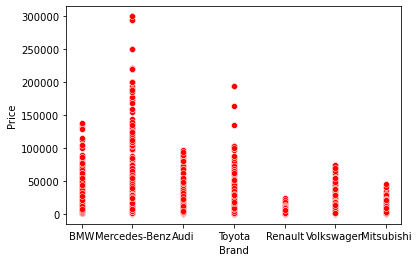

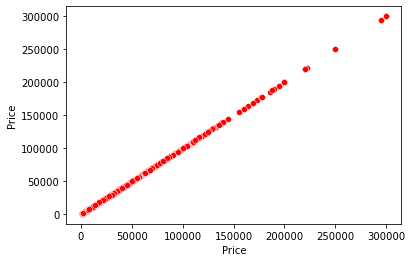

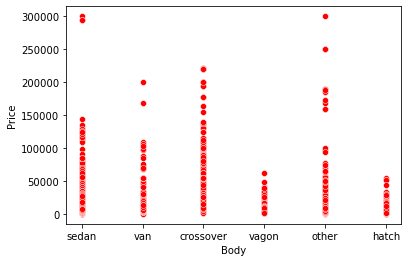

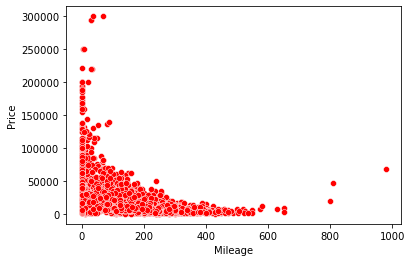

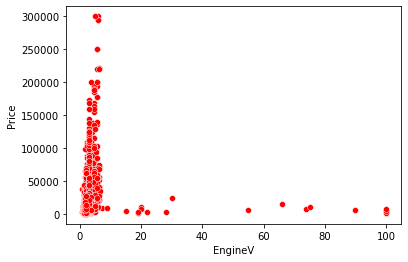

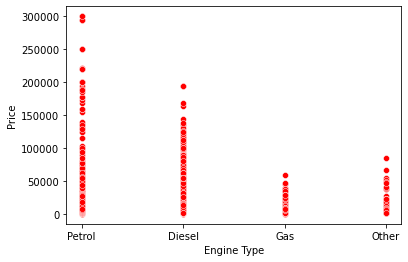

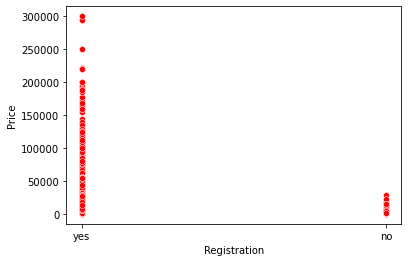

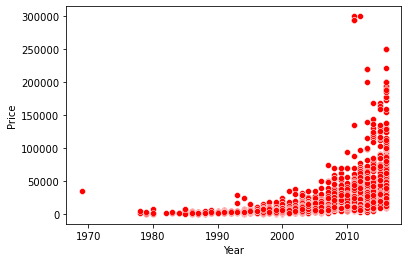

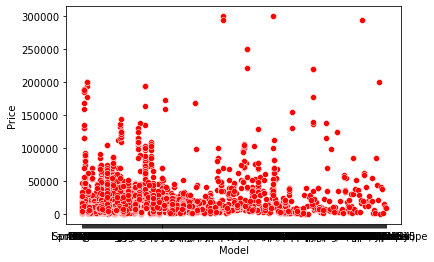

In [5]:
# Veamos como se relacionan todas las columnas con "Price".

for col in df.columns:
    sns.scatterplot(x = df[col], y = df["Price"], color = "r")
    plt.show()

In [6]:
# Vamos a tomar las columnas, de valores continuos: "Year" y "Mileage".

df[["Year", "Mileage", "Price"]]

,Year,Mileage,Price
0,1991,277,4200.0
1,1999,427,7900.0
2,2003,358,13300.0
3,2007,240,23000.0
4,2011,120,18300.0
...,...,...,...
4339,2014,35,17900.0
4340,2014,9,125000.0
4341,1999,1,6500.0
4342,1985,194,8000.0


In [7]:
X = df[["Year", "Mileage"]].values 
y = df[["Price"]].values

X.shape, y.shape

((4025, 2), (4025, 1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((2817, 2), (2817, 1))
Conjunto de Test: ((1208, 2), (1208, 1))


In [9]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [[1278.89629494  -60.26611211]]
w_0: [-2536745.11930789]


In [10]:
### Grafico de la Regresión

b = regresion_lineal.intercept_[0]
m = regresion_lineal.coef_[0][0]

# Ecuación de una recta: y = m*x + b

print(f"y = {m}x + {b}")

y = 1278.896294939503x + -2536745.1193078947


In [13]:
# Predicciones

yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:[-21639.75757679] 	Valor real:[3200.]
Predicción:[25218.37948844] 	Valor real:[35900.]
Predicción:[13748.23665573] 	Valor real:[7900.]
Predicción:[37565.89812168] 	Valor real:[80000.]
Predicción:[27354.30929353] 	Valor real:[15900.]


In [14]:
# Métricas

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 12841.464417535579
MSE:	 600071493.7499804
R**2:	 -2.116287962807431
RAE:	 0.8245628604015333
RSE:	 0.7546468962931839
Adjusted R**2:	 0.24410057773786475


In [16]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = y_test.flatten()
df_pred["yhat"] = yhat.flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
180,8300.0,8284.362744,0.1884
89,39000.0,39146.124977,0.3747
1096,14300.0,14364.205717,0.4490
930,30999.0,31164.382297,0.5335
319,26999.0,27220.469129,0.8203
694,27300.0,27052.978733,0.9048
52,41900.0,41509.811290,0.9312
196,16999.0,17163.062756,0.9651
867,11500.0,11384.550343,1.0039
702,29999.0,29691.379725,1.0254


In [17]:
df_pred.tail(20)

,y_test,yhat,diferencia
701,2650.0,-13658.014897,615.3968
836,2700.0,-14608.964750,641.0728
218,2400.0,18308.879645,662.8700
853,1900.0,-11187.865059,688.8350
353,5500.0,-33605.337247,711.0061
856,1800.0,-11100.222307,716.6790
115,3500.0,28660.582229,718.8738
1143,2400.0,-14976.835013,724.0348
0,3200.0,-21639.757577,776.2424
831,1600.0,-10832.541977,777.0339
